In [1]:
import time
import math
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# compare fact and math.factorial

p,Mod=1000000007,1000000007

def qpower(x,y):
    res = 1
    while y:
        if y % 2 != 0:
            res *= (x%p)
            res %= p
        y >>= 1
        x *= (x%p)
        x%=p
    return res

def extgcd(a, b):
    """ calcule a*x + b*y = gcd(a, b) """
    if b == 0:
        return a, 1, 0
    else:
        d, y, x = extgcd(b, a % b)
        return d, x, y - (a // b) * x

def modinv(a, m):
    """ calcule a^-1 mod m """
    g, x, y = extgcd(a, m)
    if g != 1:
        raise Exception('modular inverse does not exist')
    return x % m

def modinv2(a, m):
    """ calcule a^-1 mod m """
    return qpower(a,m-2)%m
# hand write fact is faster than math.factorial
# but modfact is even faster
def fact(n,p):
    """ calcule n! mod MOD """
    f = 1
    for i in range(2, n + 1):
        f = (f * i) % p
    return f


def ModFact(n, p):
    """ calcule n! mod p """
    ans=1
    if n <= p//2:
        #calculate the factorial normally (right argument of range() is exclusive)
        for i in range(2,n+1):
            ans = (ans * i) % p   
    else:
        #Fancypants method for large n
        for i in range(n+1,p):
            ans = (ans * i) % p
        ans = modinv(ans, p)
        ans = -1*ans + p
    return ans % p


In [3]:
# Combination
# there's not much difference between the 4 methods

def comb1(N,M):
    N,M=min(N,M),max(N,M)
    f=fact
    a=f(M,p)%Mod
    b=f(N,p)%Mod
    c=f(M-N,p)%Mod
    return a*qpower(b*c,Mod-2)%Mod

def comb2(N, M):
    N,M=min(N,M),max(N,M)
    f=fact
    a=f(M,p)%p
    b=qpower(f(N,p),p-2)%p
    c=qpower(f(M-N,p),(p-2))%p
    return a*b*c%p

def comb3(n, k):
    """ calcule C(n, k) mod p """
    if n < k:
        return 0
    if n == k:
        return 1
    return ModFact(n, p) * modinv(ModFact(k, p) * ModFact(n - k, p) % p, p) % p
    
def comb4(n, k):
    """ calcule C(n, k) mod p """
    if n < k:
        return 0
    if n == k:
        return 1
    return ModFact(n, p) * modinv2(ModFact(k, p) * ModFact(n - k, p) % p, p) % p

In [4]:
Test_num=100
testCase=np.logspace(1,5,Test_num)
testCase=testCase.astype(int)


anslog=[]
ttime=[]
testLabel=[]

In [5]:
def testComb():
    casetime=[]
    caseAns=[]
    for id,i in enumerate(testCase):
        i=int(i)
        t1 = time.time()
        ans=comb1(i,i//2)
        t2 = time.time()
        casetime.append(t2-t1)
        caseAns.append(ans)
    testLabel.append('hand write comb1')
    ttime.append(casetime)
    anslog.append(caseAns)

    casetime=[]
    caseAns=[]
    for id,i in enumerate(testCase):
        i=int(i)
        t1 = time.time()
        ans=comb2(i,i//2)
        t2 = time.time()
        casetime.append(t2-t1)
        caseAns.append(ans)
    testLabel.append('hand write comb2')
    ttime.append(casetime)
    anslog.append(caseAns)

    casetime=[]
    caseAns=[]
    for id,i in enumerate(testCase):
        i=int(i)
        t1 = time.time()
        ans=comb3(i,i//2)
        t2 = time.time()
        casetime.append(t2-t1)
        caseAns.append(ans)
    testLabel.append('hand write comb3')
    ttime.append(casetime)
    anslog.append(caseAns)

    casetime=[]
    caseAns=[]
    for id,i in enumerate(testCase):
        i=int(i)
        t1 = time.time()
        ans=comb4(i,i//2)
        t2 = time.time()
        casetime.append(t2-t1)
        caseAns.append(ans)
    testLabel.append('hand write comb4')
    ttime.append(casetime)
    anslog.append(caseAns)
    

In [6]:
def testFact():
    casetime=[]
    caseAns=[]
    for id,i in enumerate(testCase):
        i=int(i)
        # print(id)
        t1 = time.time()
        caseAns.append(fact(i,p))
        t2 = time.time()
        casetime.append(t2-t1)

    testLabel.append('hand write fact')
    ttime.append(casetime)
    anslog.append(caseAns)

    # casetime=[]
    # caseAns=[]
    # for id,i in enumerate(testCase):

    #     i=int(i)
    #     t1 = time.time()
    #     caseAns.append(math.factorial(i)%p)
    #     t2 = time.time()
    #     casetime.append(t2-t1)
        
    # testLabel.append('math.factorial')
    # ttime.append(casetime)
    # anslog.append(caseAns)


    casetime=[]
    caseAns=[]
    for id,i in enumerate(testCase):   
        i=int(i)
        t1 = time.time()
        caseAns.append(ModFact(i,p))
        t2 = time.time()
        casetime.append(t2-t1)
    testLabel.append('ModFact')
    ttime.append(casetime)
    anslog.append(caseAns)


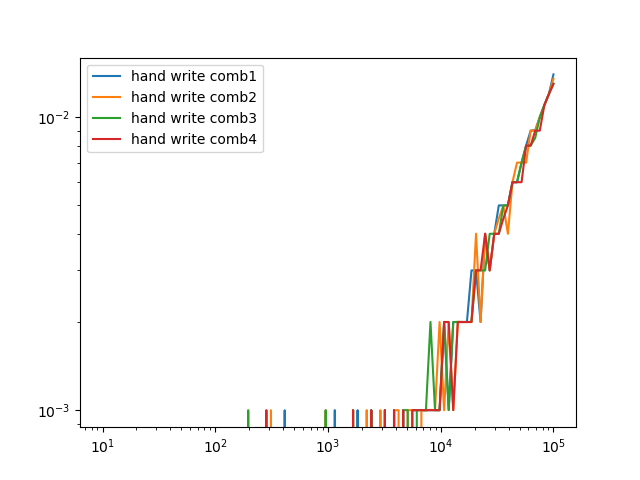

In [7]:
%matplotlib widget
# wx, gtk, osx, tk, empty uses default

anslog=[]
ttime=[]
testLabel=[]
testComb()
# testFact()

# check answer
for i in range(len(anslog)):
    for j in range(len(anslog[i])):
        if anslog[i][j]!=anslog[0][j]:
            print('wrong answer on test case',testCase[j],'at',testLabel[i],'and',testLabel[0])
            print('answer is',anslog[i][j],'and',anslog[0][j])
            assert anslog[i][j]==anslog[0][j]

# plot it in log scale

for i in range(len(ttime)):
    plt.loglog(testCase,ttime[i],label=testLabel[i])

plt.legend()



In [8]:
# print the sum of time for each test case
totaltime=[]
for i in range(len(ttime)):
    totaltime.append(sum(ttime[i]))

# print the sorted label on the basis of total time
id=np.argsort(totaltime)
for i in id:
    print(testLabel[i],totaltime[i])


hand write comb4 0.1445150375366211
hand write comb3 0.14850926399230957
hand write comb2 0.14904308319091797
hand write comb1 0.15103626251220703
